Project Title:
         Climate induced Flood prediction and early warning System. 

Problem Statement:
   Build Machine Learning System to predict flood risk and deliver early warnings using climate data.

Description:
     Use weather and hydrological records to train a model that forecasts floods and supports timely alerts for risk reduction.

In [22]:
#importing necesarry libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
import pandas as pd
data = pd.read_csv("flood.csv")
data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [24]:
import pandas as pd

# Load dataset
df = pd.read_csv("flood.csv")

# Display first few rows
print(df.head(10))

# Check data types and non-null counts
print(df.info())

# View summary statistics for all columns
print(df.describe())

# Check for missing values in each column
print(df.isnull().sum())

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   
5                 6                   6                6              4   
6                 6                   7                4              5   
7                 7                   3                5              5   
8                 6                   3                5              4   
9                 4                   3                5              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1           

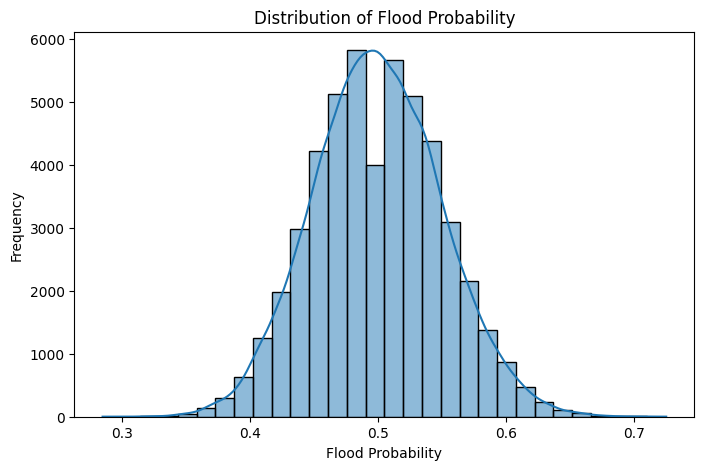

In [25]:
# Histogram of a key variable, e.g., 'FloodProbability'
#Distribution of flood probability
plt.figure(figsize=(8, 5))
sns.histplot(data['FloodProbability'], bins=30, kde=True)
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()


In [26]:
print(data.columns)


Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


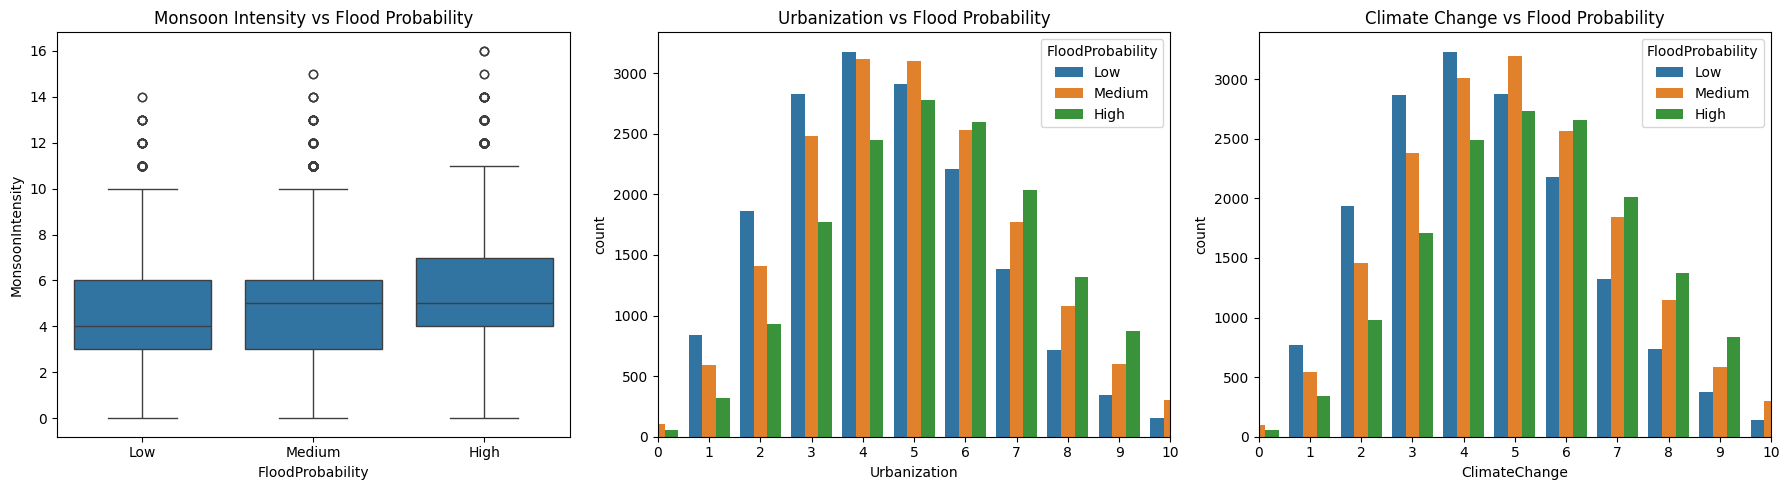

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot: Monsoon Intensity vs Flood Probability (no xlim needed for boxplot)
sns.boxplot(x=pd.qcut(data['FloodProbability'], 3, labels=['Low', 'Medium', 'High']),
            y='MonsoonIntensity', data=data, ax=axes[0])
axes[0].set_title('Monsoon Intensity vs Flood Probability')

# Countplot: Urbanization vs Flood Probability Category
sns.countplot(x='Urbanization',
              hue=pd.qcut(data['FloodProbability'], 3, labels=['Low', 'Medium', 'High']),
              data=data, ax=axes[1])
axes[1].set_title('Urbanization vs Flood Probability')
axes[1].set_xlim([0, 10])  # Limit x-axis from 0 to 10

# Countplot: Climate Change vs Flood Probability Category
sns.countplot(x='ClimateChange',
              hue=pd.qcut(data['FloodProbability'], 3, labels=['Low', 'Medium', 'High']),
              data=data, ax=axes[2])
axes[2].set_title('Climate Change vs Flood Probability')
axes[2].set_xlim([0, 10])  # Limit x-axis from 0 to 10

plt.tight_layout()
plt.show()


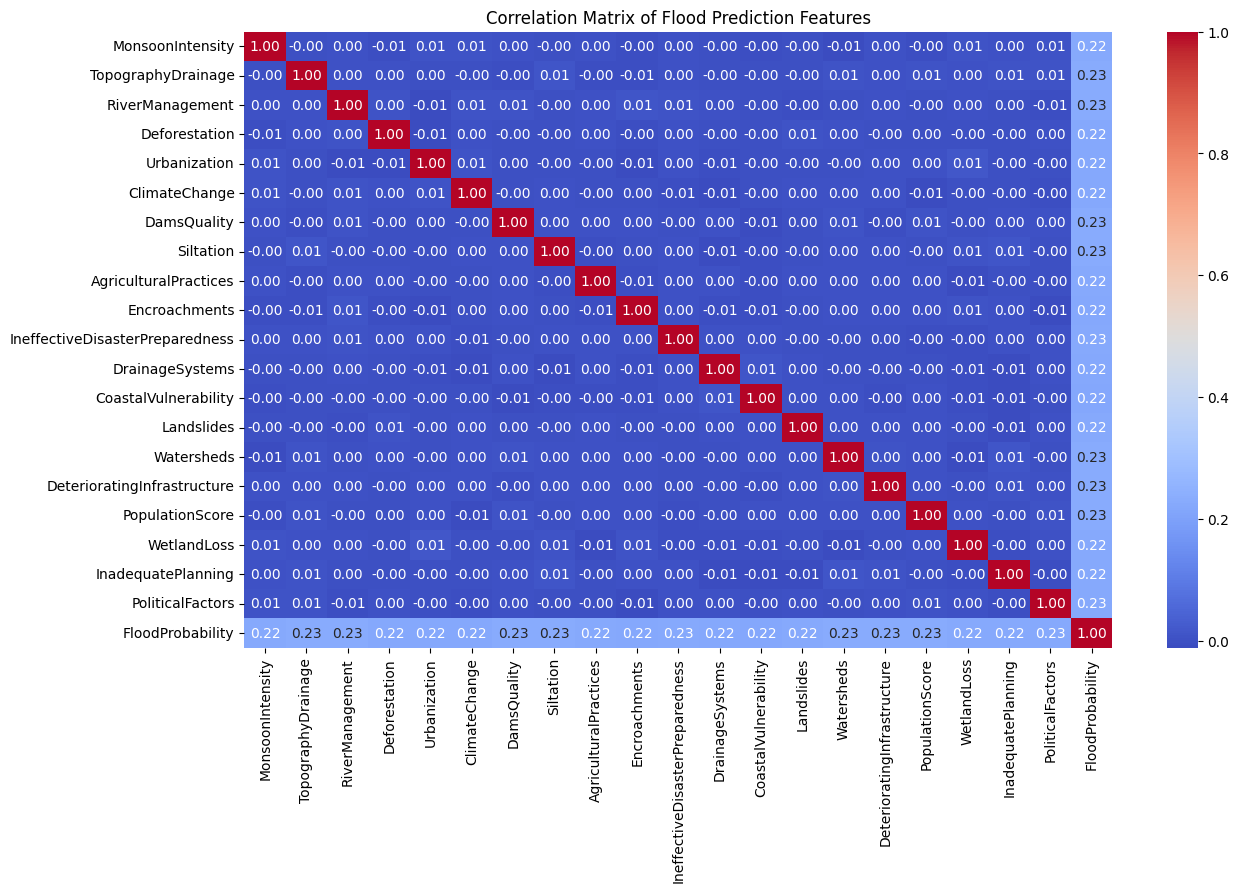

In [28]:
# correlation matrix

plt.figure(figsize=(14, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Flood Prediction Features')
plt.show()


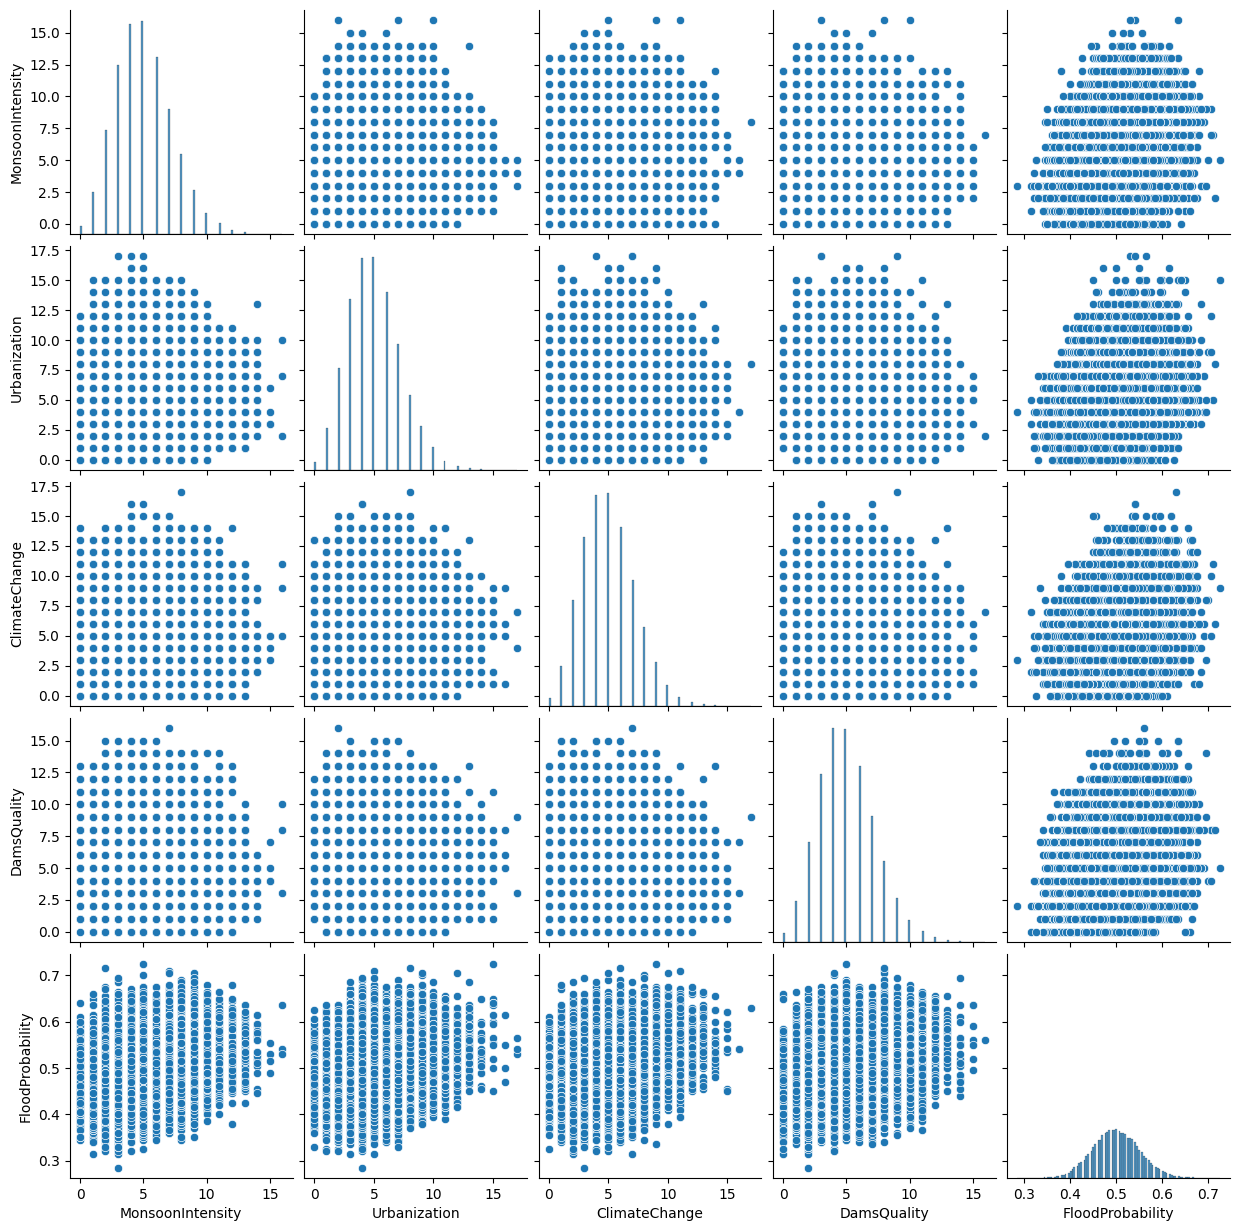

In [29]:
# Pick top numerical features to pair-plot, include FloodProbability if feasible
main_cols = ['MonsoonIntensity', 'Urbanization', 'ClimateChange', 'DamsQuality', 'FloodProbability']
sns.pairplot(data[main_cols])
plt.show()


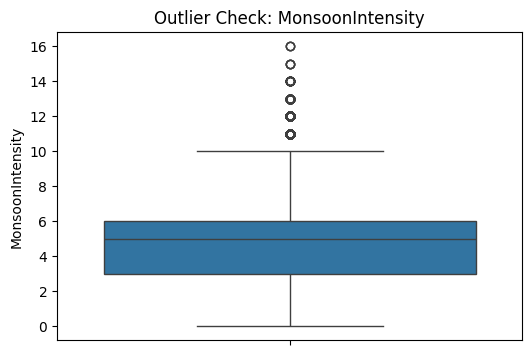

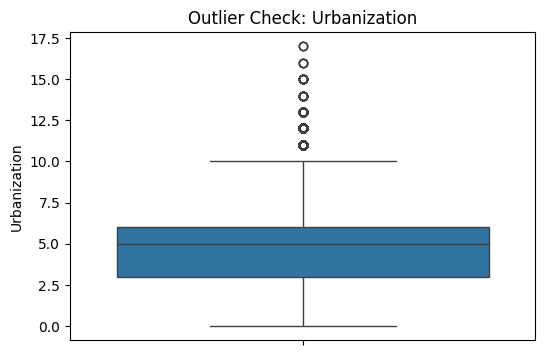

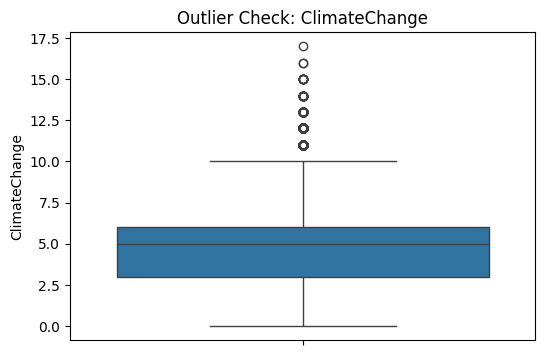

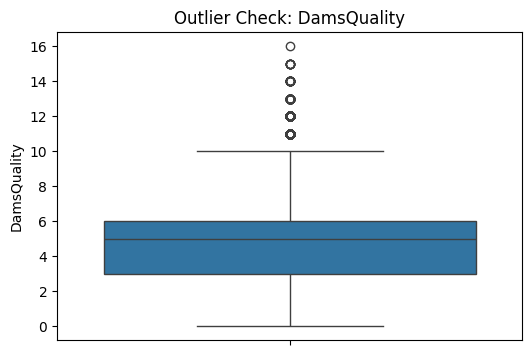

In [30]:
# Boxplots for outlier checking in main features
for col in main_cols[:-1]:  # skip FloodProbability if continuous
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()


In [31]:
# Separate features and target
X = data.drop('FloodProbability', axis=1)
y = data['FloodProbability']

# Optional: Convert continuous target to categorical labels for classification
y_cat = pd.qcut(y, 3, labels=['Low', 'Medium', 'High'])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for easy handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Final dataset with scaled features and target category for classification
final_data = X_scaled_df.copy()
final_data['FloodCategory'] = y_cat

# Check transformed dataset
print(final_data.head())


   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0         -0.890321            1.342509         0.441028       0.446084   
1          1.345004           -0.438066        -0.007144       0.895983   
2         -0.890321            2.232796        -0.455316      -1.803411   
3         -0.443256           -0.438066        -1.351659       0.895983   
4         -0.890321            0.897365        -0.007144      -1.353512   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0     -0.440927      -0.443851     0.438597  -1.338607              -0.897767   
1      0.896486       1.801586    -1.788597   0.005106              -0.002739   
2      0.896486       0.005236    -0.452281   0.900915              -0.450253   
3     -0.886732      -0.443851    -1.788597  -0.442798               0.444776   
4      0.004877       1.352498    -0.006842  -1.338607               0.892290   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  

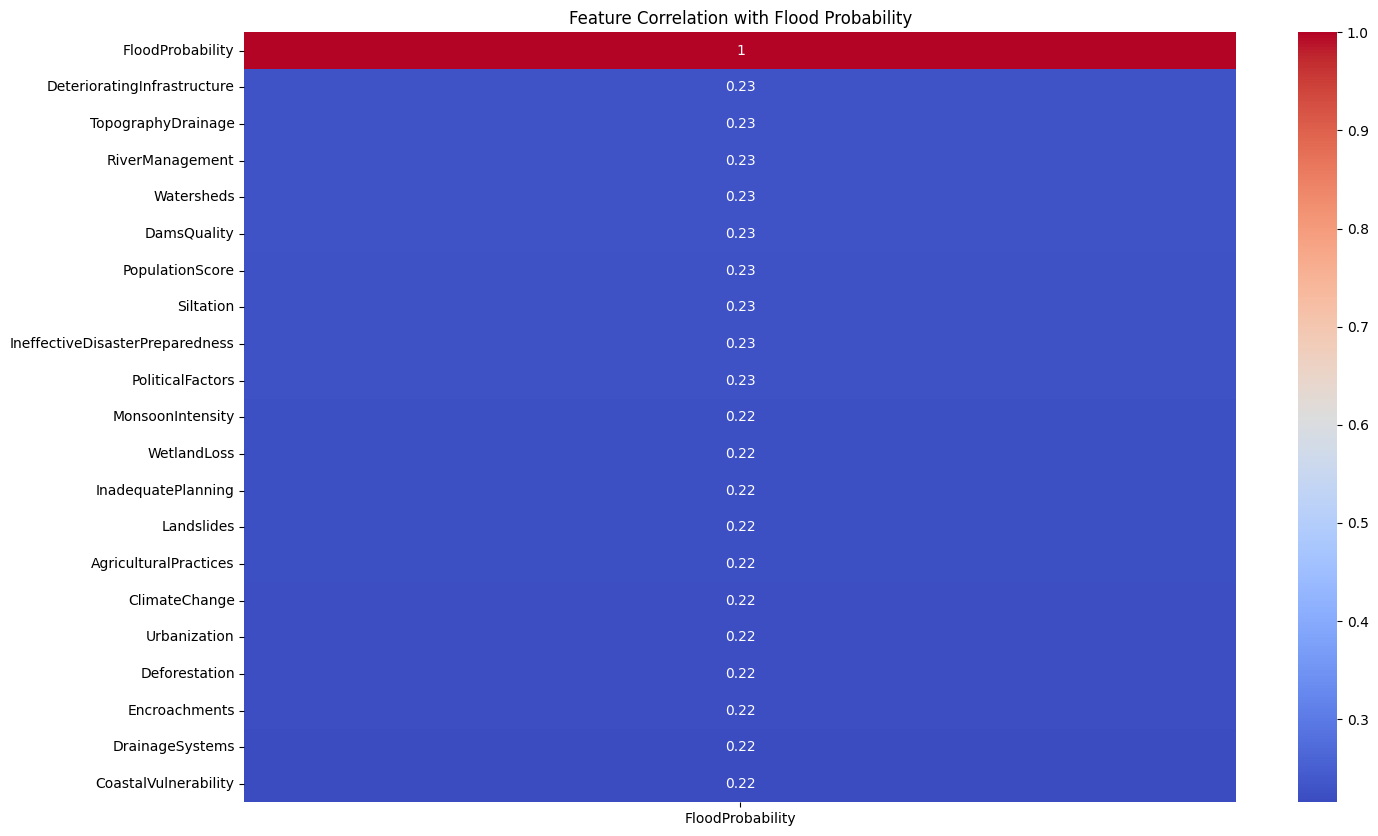

In [32]:

#correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix[['FloodProbability']].sort_values(by='FloodProbability', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Flood Probability')
plt.show()


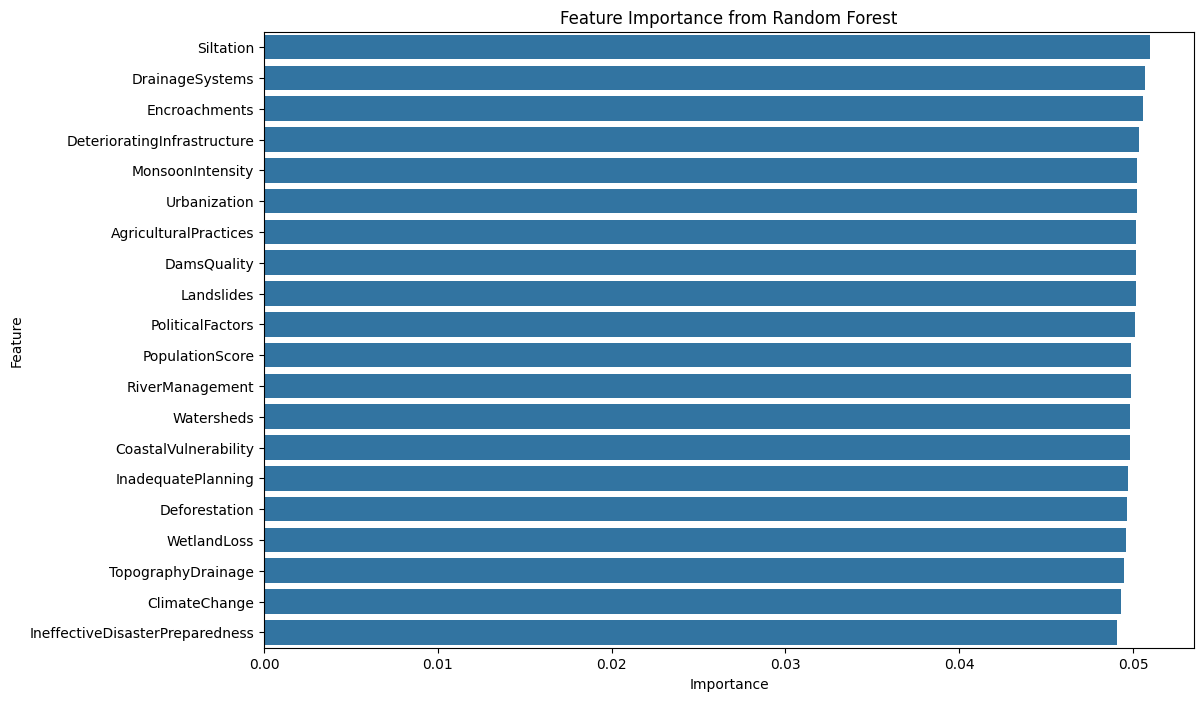

In [33]:
#Feature Importance from Random Forest (Embedded Method)
from sklearn.ensemble import RandomForestClassifier

# Prepare data (using scaled features and categorical target 'FloodCategory')
X = final_data.drop('FloodCategory', axis=1)
y = final_data['FloodCategory']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_list = X.columns

# Create a DataFrame for visualization
feature_imp_df = pd.DataFrame({'Feature': feature_list, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [34]:
# Display the features sorted by importance descending
print(feature_imp_df)

# Select top features based on importance (e.g., top 10)
top_features = feature_imp_df['Feature'].head(10).tolist()
print("Top features selected:", top_features)


                            Feature  Importance
7                         Siltation    0.050963
11                  DrainageSystems    0.050703
9                     Encroachments    0.050569
15      DeterioratingInfrastructure    0.050341
0                  MonsoonIntensity    0.050250
4                      Urbanization    0.050203
8             AgriculturalPractices    0.050171
6                       DamsQuality    0.050168
13                       Landslides    0.050160
19                 PoliticalFactors    0.050117
16                  PopulationScore    0.049896
2                   RiverManagement    0.049881
14                       Watersheds    0.049850
12             CoastalVulnerability    0.049815
18               InadequatePlanning    0.049726
3                     Deforestation    0.049663
17                      WetlandLoss    0.049618
1                TopographyDrainage    0.049494
5                     ClimateChange    0.049332
10  IneffectiveDisasterPreparedness    0

In [35]:
# Handle missing values, for example:
X[top_features] = X[top_features].fillna(X[top_features].median())

# Address outliers (example: capping with 1st/99th percentile)
for col in top_features:
    lower = X[col].quantile(0.01)
    upper = X[col].quantile(0.99)
    X[col] = X[col].clip(lower, upper)

# Encode categorical variables (if any)
# For demonstration purposes only:
# X = pd.get_dummies(X, columns=['CategoricalColumn'])

# Use only top features selected
X_final = X[top_features]

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume you have your dataset ready, X with top selected features, and y as target

# Split data first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.2, random_state=42, stratify=y)

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=top_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=top_features, index=X_test.index)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

Define features and target

Using your preprocessed, scaled features (e.g., X_train_scaled_df, X_test_scaled_df).
Use the categorized target variable (y_train, y_test) if classification, or continuous target for regression.

Initialize Models:
             Start with models like RandomForestClassifier and LogisticRegression
which you already imported.



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_df, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled_df)

# Performance metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled_df, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled_df)

# Performance metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Random Forest Accuracy: 0.5628
Classification Report:
               precision    recall  f1-score   support

        High       0.62      0.62      0.62      3202
         Low       0.62      0.65      0.63      3338
      Medium       0.45      0.43      0.44      3460

    accuracy                           0.56     10000
   macro avg       0.56      0.57      0.56     10000
weighted avg       0.56      0.56      0.56     10000

Confusion Matrix:
 [[1982  304  916]
 [ 274 2172  892]
 [ 945 1041 1474]]
Logistic Regression Accuracy: 0.5846
Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.64      0.65      3202
         Low       0.64      0.67      0.65      3338
      Medium       0.46      0.45      0.45      3460

    accuracy                           0.58     10000
   macro avg       0.58      0.59      0.59     10000
weighted avg       0.58      0.58      0.58     10000

Confusion Matrix:
 [[2065  243  894]
 [ 206 2241

Random Forest Classifier Evaluation
Accuracy: 0.5628
Classification Report:
               precision    recall  f1-score   support

        High       0.62      0.62      0.62      3202
         Low       0.62      0.65      0.63      3338
      Medium       0.45      0.43      0.44      3460

    accuracy                           0.56     10000
   macro avg       0.56      0.57      0.56     10000
weighted avg       0.56      0.56      0.56     10000



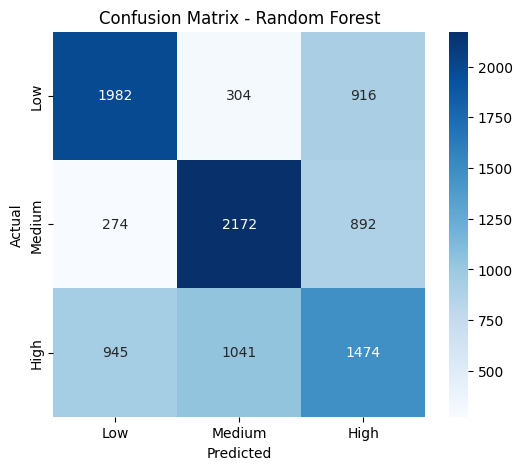

Logistic Regression Evaluation
Accuracy: 0.5846
Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.64      0.65      3202
         Low       0.64      0.67      0.65      3338
      Medium       0.46      0.45      0.45      3460

    accuracy                           0.58     10000
   macro avg       0.58      0.59      0.59     10000
weighted avg       0.58      0.58      0.58     10000



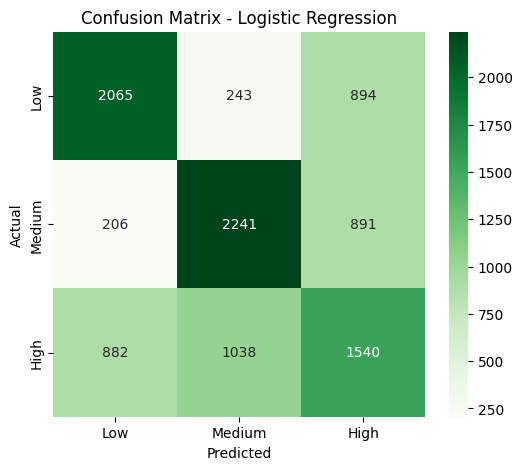

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For Random Forest model (example)
print("Random Forest Classifier Evaluation")

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Similarly for Logistic Regression
print("Logistic Regression Evaluation")

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Model Tuning and  optimization

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled_df, y_train)

print("RandomizedSearchCV - Best Params:", random_search.best_params_)
print("RandomizedSearchCV - Best CV Accuracy: {:.4f}".format(random_search.best_score_))

random_best_rf = random_search.best_estimator_
y_pred_random = random_best_rf.predict(X_test_scaled_df)
print("RandomizedSearchCV - Test Accuracy:", accuracy_score(y_test, y_pred_random))
print(classification_report(y_test, y_pred_random))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
RandomizedSearchCV - Best Params: {'bootstrap': True, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 99}
RandomizedSearchCV - Best CV Accuracy: 0.5655
RandomizedSearchCV - Test Accuracy: 0.5656
              precision    recall  f1-score   support

        High       0.63      0.61      0.62      3202
         Low       0.63      0.65      0.64      3338
      Medium       0.44      0.44      0.44      3460

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



flood prediction project to compute and visualize a correlation matrix of your numerical features, just like the screenshot you provided

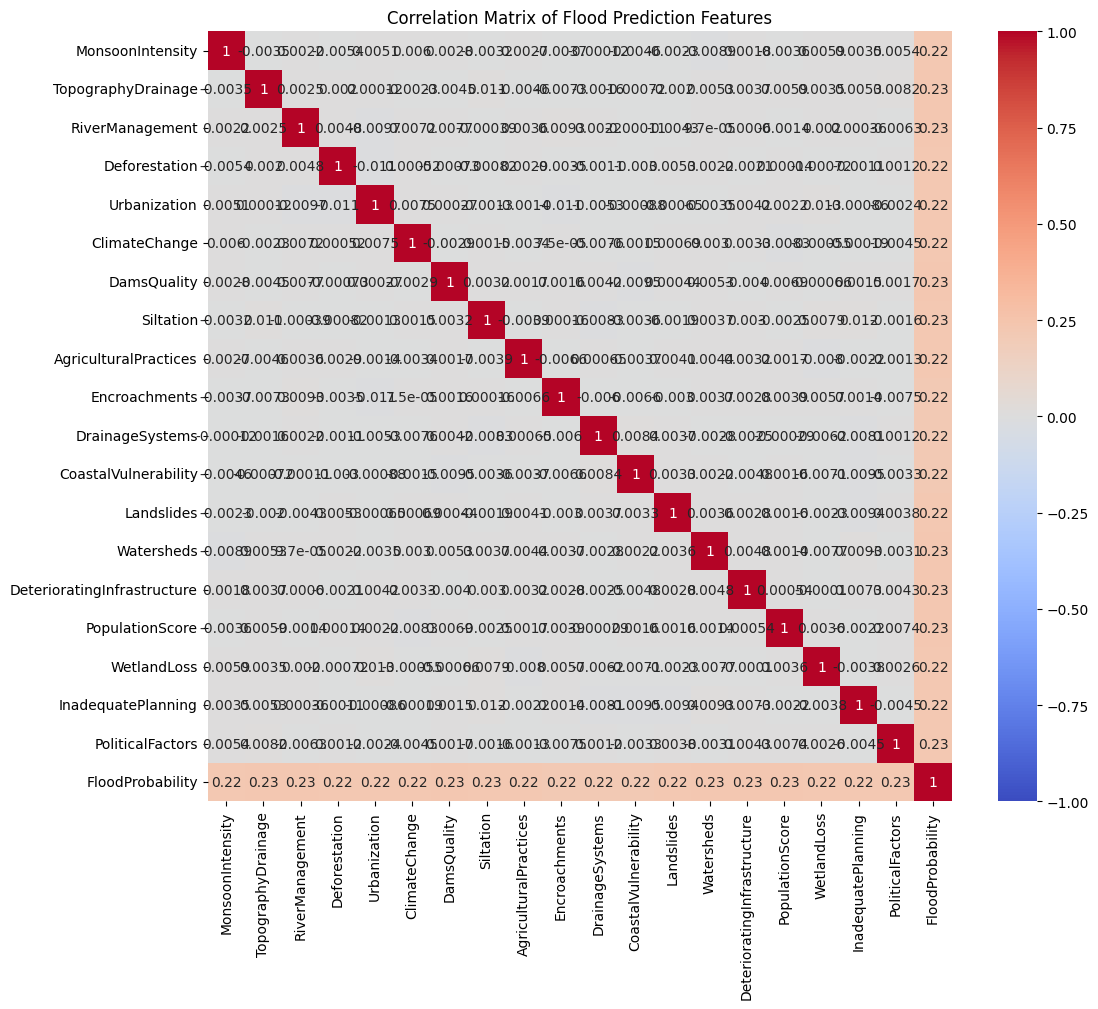

                             MonsoonIntensity  TopographyDrainage  \
MonsoonIntensity                     1.000000           -0.003470   
TopographyDrainage                  -0.003470            1.000000   
RiverManagement                      0.002247            0.002492   
Deforestation                       -0.005384            0.002046   
Urbanization                         0.005092            0.000116   
ClimateChange                        0.005959           -0.002288   
DamsQuality                          0.002790           -0.004472   
Siltation                           -0.003191            0.010675   
AgriculturalPractices                0.002723           -0.004550   
Encroachments                       -0.003723           -0.007272   
DrainageSystems                     -0.000118           -0.001608   
CoastalVulnerability                -0.004600           -0.000717   
Landslides                          -0.002315           -0.002040   
Watersheds                        

In [47]:
# Create a copy of the flood dataset
df_corr = data.copy()  # Replace 'data' with your DataFrame name if needed

# Select relevant numerical columns you want to check correlations for
num_cols = [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
    'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation',
    'AgriculturalPractices', 'Encroachments', 'DrainageSystems',
    'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure',
    'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors',
    'FloodProbability'
]

# Compute correlation matrix
corr_matrix = df_corr[num_cols].corr()

# Plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Flood Prediction Features')
plt.show()

# Display correlation matrix (optional for detailed numbers)
print(corr_matrix)


Final Model Training

In [48]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(
    n_estimators=99,
    max_depth=11,
    max_features='sqrt',
    min_samples_split=3,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

final_model.fit(X_train_scaled_df, y_train)


,n_estimators,99
,criterion,'gini'
,max_depth,11
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Final Model Testing

Final Model Test Accuracy: 0.5656
              precision    recall  f1-score   support

        High       0.63      0.61      0.62      3202
         Low       0.63      0.65      0.64      3338
      Medium       0.44      0.44      0.44      3460

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



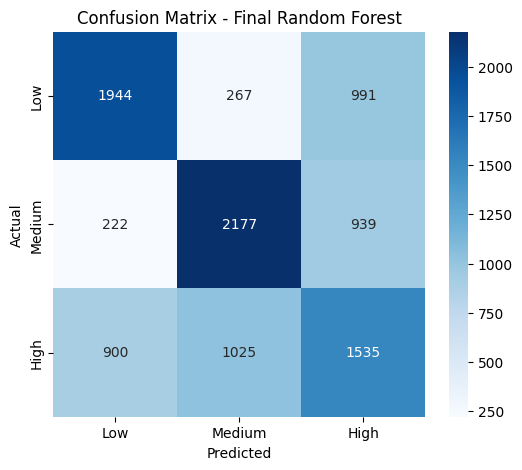

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict test labels
y_pred_final = final_model.predict(X_test_scaled_df)

# Print metrics
print("Final Model Test Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

# Optional: Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Final Random Forest')
plt.show()


Save the Trained Model and Scaler

In [50]:
import joblib

# Save the final model
joblib.dump(final_model, 'flood_final_model.pkl')
print("Model saved as flood_final_model.pkl")

# If you used a scaler, save it too:
joblib.dump(scaler, 'flood_scaler.pkl')
print("Scaler saved as flood_scaler.pkl")


Model saved as flood_final_model.pkl
Scaler saved as flood_scaler.pkl


feature_list.pkl

In [51]:
# After creating X_train_scaled_df, where columns match training input order for scaler/model
import joblib
feature_list = list(X_train_scaled_df.columns)
joblib.dump(feature_list, 'feature_list.pkl')


['feature_list.pkl']